<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/Labs/in_class_clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp
from scipy import spatial
import seaborn as sns


%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/fbb.mplstyle")
np.set_printoptions(precision=2)
rcParams['figure.figsize'] = 10, 10


Populating the interactive namespace from numpy and matplotlib


This is a dataset of gene expressions - the original data is described here https://manualzz.com/doc/25569970/dkfz-kidpack-gene-expression-data-technical-guide : its a dataset of genomic expressions used for Renal Cancer research

In [2]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/data/kidpackgenes.csv", index_col=0)

In [ ]:
genes.head()

1         2         3         4         5         6         7  \
1 -0.146342 -0.520637  0.175828 -0.323736  0.172691  0.025156  0.024812   
2 -0.465767  0.155823  0.226344 -0.547542  0.041096  0.137012  0.102497   
3 -0.088964 -0.208241 -0.151039 -0.288229 -0.425568  0.121006 -0.097883   
4 -0.327696 -1.714948  0.068710 -0.168257 -0.471577  0.279013 -0.060734   
5 -0.092327 -0.660456  0.075948 -0.646501 -0.046137 -0.010305  0.368476   

          8        10        11  ...        76        77        78        79  \
1  0.172268  0.207188  0.026710  ...  0.240705 -0.347746 -0.001797 -0.260594   
2 -0.034277  0.500871  0.005533  ...  0.371435 -0.447105 -0.134904 -0.250699   
3 -0.007597  0.329636 -0.222495  ... -0.014990 -0.458297 -0.050852 -0.168500   
4 -0.222574  0.658097  0.129876  ...  0.153765 -0.140409 -0.119515 -0.289881   
5 -0.043832 -0.321060  0.116657  ... -0.033032  0.394082  0.173515 -0.194819   

         81        83        84        85        86        87  
1  0.105968  0.110885 -0.006975  0.550118  0.118934  0.327248  
2  0.164698 -0.035022  0.250384  0.463746 -0.514230  0.200956  
3  0.078716 -0.032231 -0.116947 -0.199880 -0.415793 -0.032004  
4  0.944493 -0.142710 -1.119866 -0.215536  0.345946  0.056442  
5  0.149131 -0.097285 -0.288192 -0.491920 -0.722120  0.055477  

[5 rows x 74 columns]

# 1. explore the data.

In [ ]:
genes.shape

(4224, 74)

In [ ]:
genes.describe()

1            2            3            4            5  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean     -0.094115    -0.027780    -0.001672    -0.110167    -0.047817   
std       0.502677     0.340808     0.328042     0.692851     0.434918   
min      -2.205219    -1.779857    -3.072872    -3.491640    -2.479485   
25%      -0.394770    -0.227638    -0.182975    -0.528570    -0.277542   
50%      -0.069031    -0.016486    -0.014913    -0.046870    -0.018104   
75%       0.235924     0.178946     0.167848     0.376756     0.217731   
max       2.403599     1.609597     2.357123     1.987768     2.278563   

                 6            7            8           10           11  ...  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  ...   
mean     -0.000598    -0.043284    -0.029803    -0.055334    -0.017651  ...   
std       0.348743     0.377675     0.350009     0.477607     0.353382  ...   
min      -2.767680    -1.807954    -1.835609    -3.214822    -2.205530  ...   
25%      -0.178646    -0.292570    -0.223971    -0.312487    -0.227375  ...   
50%       0.021162    -0.072925    -0.018363    -0.066373    -0.008910  ...   
75%       0.208004     0.168238     0.182520     0.205242     0.195324  ...   
max       2.106546     1.957411     1.807777     2.719371     3.194689  ...   

                76           77           78           79           81  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean     -0.033086    -0.050599    -0.023801    -0.042946     0.020522   
std       0.482347     0.410243     0.327410     0.354847     0.389799   
min      -2.946771    -3.281180    -2.787443    -1.938678    -2.932198   
25%      -0.315895    -0.298579    -0.191197    -0.259851    -0.207651   
50%      -0.026565    -0.042374    -0.010210    -0.015849    -0.001221   
75%       0.241220     0.200383     0.160373     0.195828     0.226961   
max       3.058383     1.960692     1.940195     1.352897     2.451836   

                83           84           85           86           87  
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  
mean     -0.051150     0.004469    -0.001898    -0.143864    -0.002374  
std       0.401593     0.479766     0.487669     0.532901     0.346003  
min      -3.054572    -3.189679    -2.955538    -2.909000    -1.563549  
25%      -0.259171    -0.242053    -0.264326    -0.441299    -0.210836  
50%      -0.024906    -0.006854    -0.021976    -0.095412    -0.016940  
75%       0.195206     0.243014     0.237617     0.208726     0.189075  
max       1.733719     2.586922     3.230761     1.583828     1.694063  

[8 rows x 74 columns]

In [ ]:
genes.isna().sum().sum()

np.int64(0)

There are no missing values. The data consistes of 4224 observations and 75 gene expressions. A quick google search shows that this is as expected: https://www.bioconductor.org/packages/devel/data/experiment/manuals/kidpack/man/kidpack.pdf

array([[<Axes: xlabel='1', ylabel='1'>, <Axes: xlabel='2', ylabel='1'>,
        <Axes: xlabel='3', ylabel='1'>, ...,
        <Axes: xlabel='85', ylabel='1'>, <Axes: xlabel='86', ylabel='1'>,
        <Axes: xlabel='87', ylabel='1'>],
       [<Axes: xlabel='1', ylabel='2'>, <Axes: xlabel='2', ylabel='2'>,
        <Axes: xlabel='3', ylabel='2'>, ...,
        <Axes: xlabel='85', ylabel='2'>, <Axes: xlabel='86', ylabel='2'>,
        <Axes: xlabel='87', ylabel='2'>],
       [<Axes: xlabel='1', ylabel='3'>, <Axes: xlabel='2', ylabel='3'>,
        <Axes: xlabel='3', ylabel='3'>, ...,
        <Axes: xlabel='85', ylabel='3'>, <Axes: xlabel='86', ylabel='3'>,
        <Axes: xlabel='87', ylabel='3'>],
       ...,
       [<Axes: xlabel='1', ylabel='85'>, <Axes: xlabel='2', ylabel='85'>,
        <Axes: xlabel='3', ylabel='85'>, ...,
        <Axes: xlabel='85', ylabel='85'>,
        <Axes: xlabel='86', ylabel='85'>,
        <Axes: xlabel='87', ylabel='85'>],
       [<Axes: xlabel='1', ylabel='86'>, <

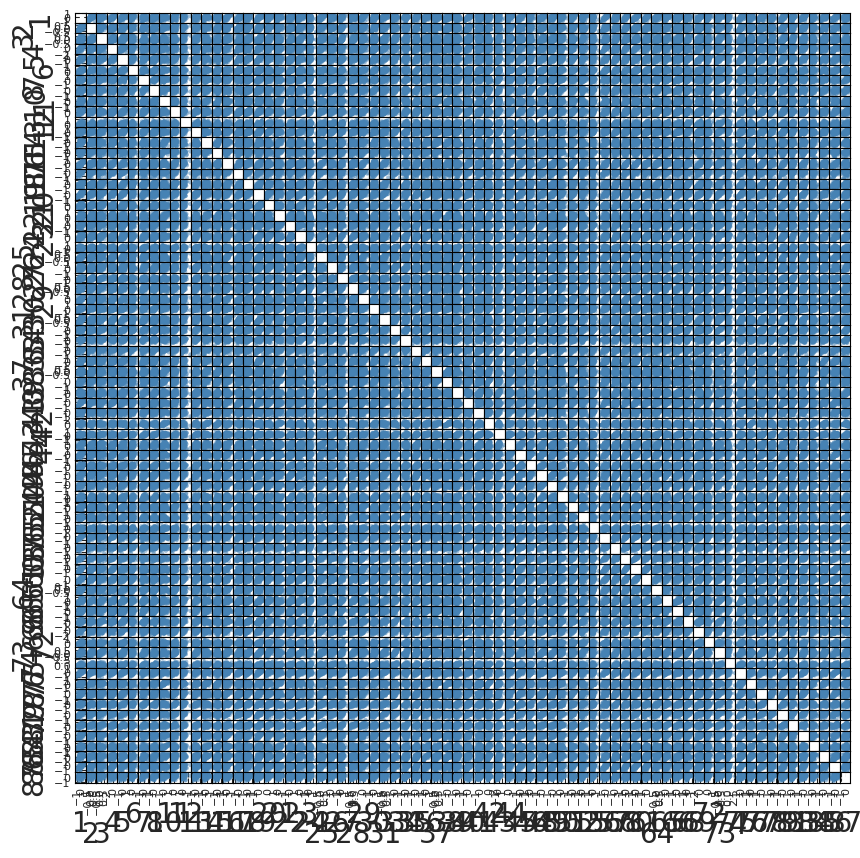

In [ ]:
np.random.seed(302)
pd.plotting.scatter_matrix(genes.iloc[np.random.randint(0, genes.shape[0], 100)])

In [ ]:
# Display descriptive statistics of the DataFrame again
genes.describe()

1            2            3            4            5  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean     -0.094115    -0.027780    -0.001672    -0.110167    -0.047817   
std       0.502677     0.340808     0.328042     0.692851     0.434918   
min      -2.205219    -1.779857    -3.072872    -3.491640    -2.479485   
25%      -0.394770    -0.227638    -0.182975    -0.528570    -0.277542   
50%      -0.069031    -0.016486    -0.014913    -0.046870    -0.018104   
75%       0.235924     0.178946     0.167848     0.376756     0.217731   
max       2.403599     1.609597     2.357123     1.987768     2.278563   

                 6            7            8           10           11  ...  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  ...   
mean     -0.000598    -0.043284    -0.029803    -0.055334    -0.017651  ...   
std       0.348743     0.377675     0.350009     0.477607     0.353382  ...   
min      -2.767680    -1.807954    -1.835609    -3.214822    -2.205530  ...   
25%      -0.178646    -0.292570    -0.223971    -0.312487    -0.227375  ...   
50%       0.021162    -0.072925    -0.018363    -0.066373    -0.008910  ...   
75%       0.208004     0.168238     0.182520     0.205242     0.195324  ...   
max       2.106546     1.957411     1.807777     2.719371     3.194689  ...   

                76           77           78           79           81  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean     -0.033086    -0.050599    -0.023801    -0.042946     0.020522   
std       0.482347     0.410243     0.327410     0.354847     0.389799   
min      -2.946771    -3.281180    -2.787443    -1.938678    -2.932198   
25%      -0.315895    -0.298579    -0.191197    -0.259851    -0.207651   
50%      -0.026565    -0.042374    -0.010210    -0.015849    -0.001221   
75%       0.241220     0.200383     0.160373     0.195828     0.226961   
max       3.058383     1.960692     1.940195     1.352897     2.451836   

                83           84           85           86           87  
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  
mean     -0.051150     0.004469    -0.001898    -0.143864    -0.002374  
std       0.401593     0.479766     0.487669     0.532901     0.346003  
min      -3.054572    -3.189679    -2.955538    -2.909000    -1.563549  
25%      -0.259171    -0.242053    -0.264326    -0.441299    -0.210836  
50%      -0.024906    -0.006854    -0.021976    -0.095412    -0.016940  
75%       0.195206     0.243014     0.237617     0.208726     0.189075  
max       1.733719     2.586922     3.230761     1.583828     1.694063  

[8 rows x 74 columns]

In [ ]:
# Scale the gene expression data using StandardScaler from scikit-learn make it mean 0 standard deviation 1
scaledgenes = skl.preprocessing.scale(genes, axis=0)

In [ ]:
# Attempt to use the describe() method on the scaled data (which is a NumPy array)
# This will result in an error as NumPy arrays do not have a describe method
scaledgenes.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
# Calculate and round the mean of each feature (column) in the scaled data
scaledgenes.mean(axis=0).round(2)

array([ 0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
        0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,
       -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.])

In [ ]:
# Calculate and round the standard deviation of each feature (column) in the scaled data
scaledgenes.std(axis=0).round(2)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
genes_tsne = skl.manifold.TSNE(n_components=2)
genes_tsne

TSNE()

In [ ]:
twodproj = genes_tsne.fit_transform(scaledgenes)
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


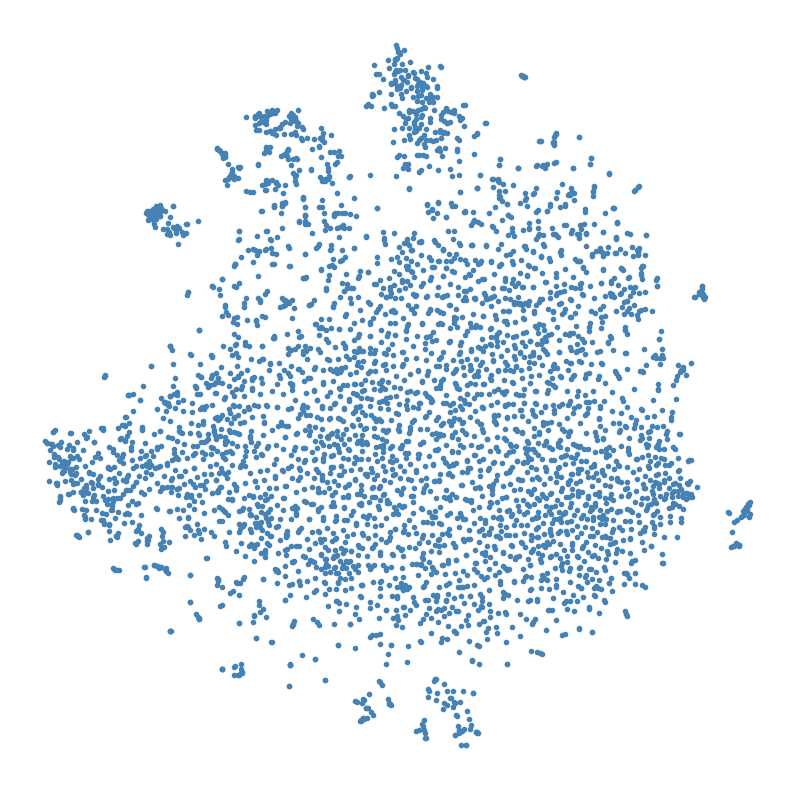

In [ ]:
pl.plot(twodproj[:,0], twodproj[:,1], '.')
pl.axis('off');

Figure 1: 2-dimensional projection of the "kidpack" genes which (from a trivial google search) contains expression measures for 4224 genes and 74 patients. This 2D projection is generates with the TSNE algorithm with default sklearn parameters corresponding to 30 nearest-neighbours and a Eucledian distance metric in the 72 dimensional parameter space. Note that TSNE plots are an exception to the rule that axis always need to be labelled! the TSNE projections are unitless and do not have any physical meaning.

OBSOLETE: 2.4 calculate a function that measures the intracluster variance _ BUT YOU CAN USE THE .inertia_ ATTRIBUTE OF KMeans() SO NO LONGER NECESSARY

# DISTANCES
2.5 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?


In [ ]:
#calculate pairwise distance first with the euclidean and then cosine metric, notice the differences! (cells are overwritten with the new distance)
dists = sp.spatial.distance.pdist(scaledgenes, metric='cosine')
dists

array([0.25, 0.59, 0.54, ..., 0.28, 0.46, 0.32])

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

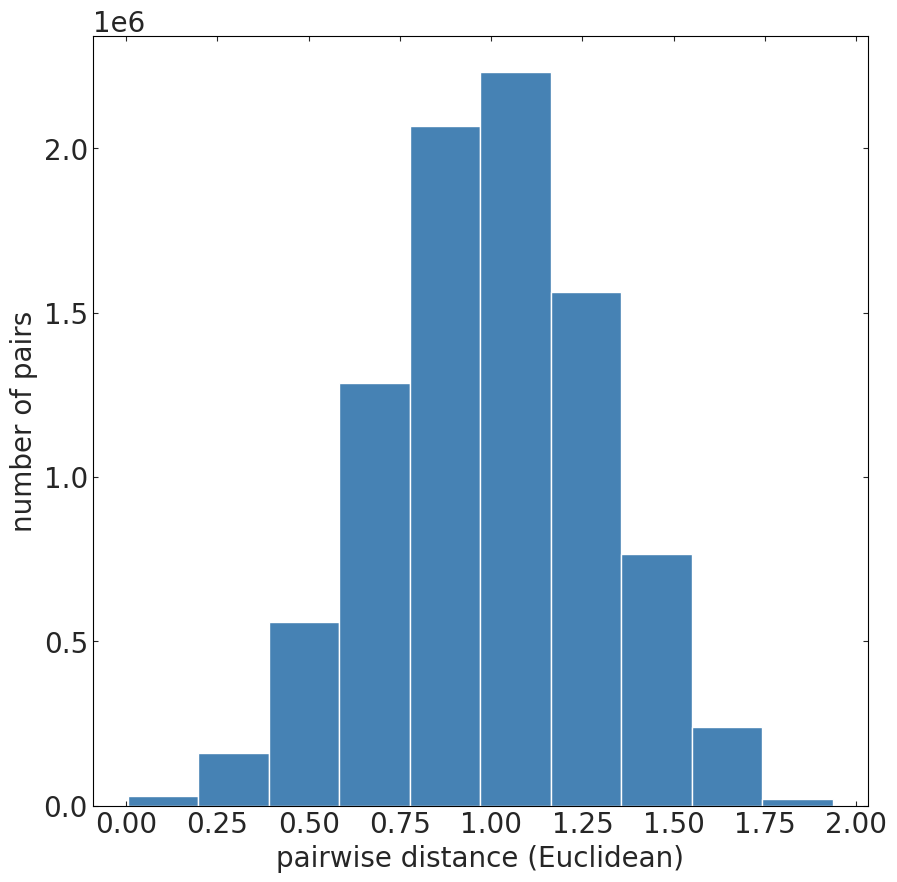

In [ ]:
# Plot a histogram of the pairwise distances
pl.hist(dists);
pl.ylabel("number of pairs")
pl.xlabel("pairwise distance (cosine)");

**Figure 6**: Distribution of pairwise (Euclidean or Cosine) distances between gene observations in the kidpack gene library. This histogram will be used to guess an appriopriate distance to define core clusters in the DBSCAN method

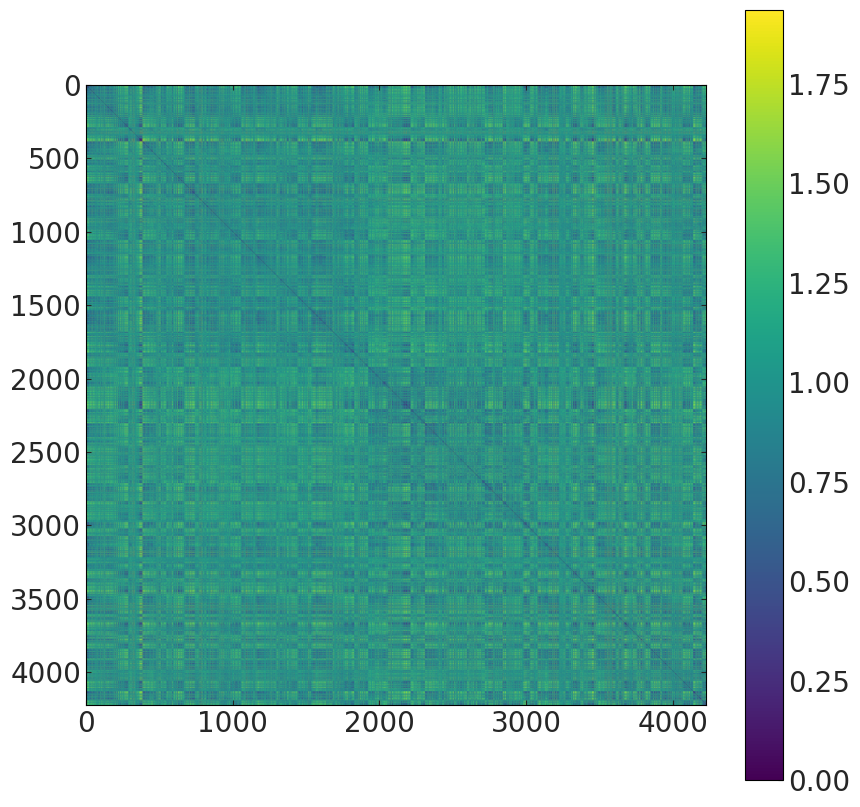

In [ ]:
#plot them as a heatmap - notice any patterns? why is the diagonal the way it is?
pl.imshow(sp.spatial.distance.squareform(dists))
pl.colorbar()

**Figure 2**: the distance matrix for a Euclidian distance between observations in the kidpack genes library. There is no obvious structure but the small dynamic range impairs the visual inspection. A log plot may give more insight.

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

In [ ]:
#cluster the first 2 features (columns) only with kmeans into 2 clusters, so we can plot them and see the features vs cluster result
km = skl.cluster.KMeans(n_clusters=2, random_state=302)

In [ ]:
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': 302,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
km.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [ ]:
km.fit(scaledgenes[:,:2])

KMeans(n_clusters=2, random_state=302)

In [ ]:
# now the inertia, which measures the intercluster compactness, is populated after the fit
km.inertia_

4699.801682342804

In [ ]:
np.unique(km.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([2433, 1791]))

In [ ]:
km.cluster_centers_

array([[ 0.59,  0.56],
       [-0.8 , -0.75]])

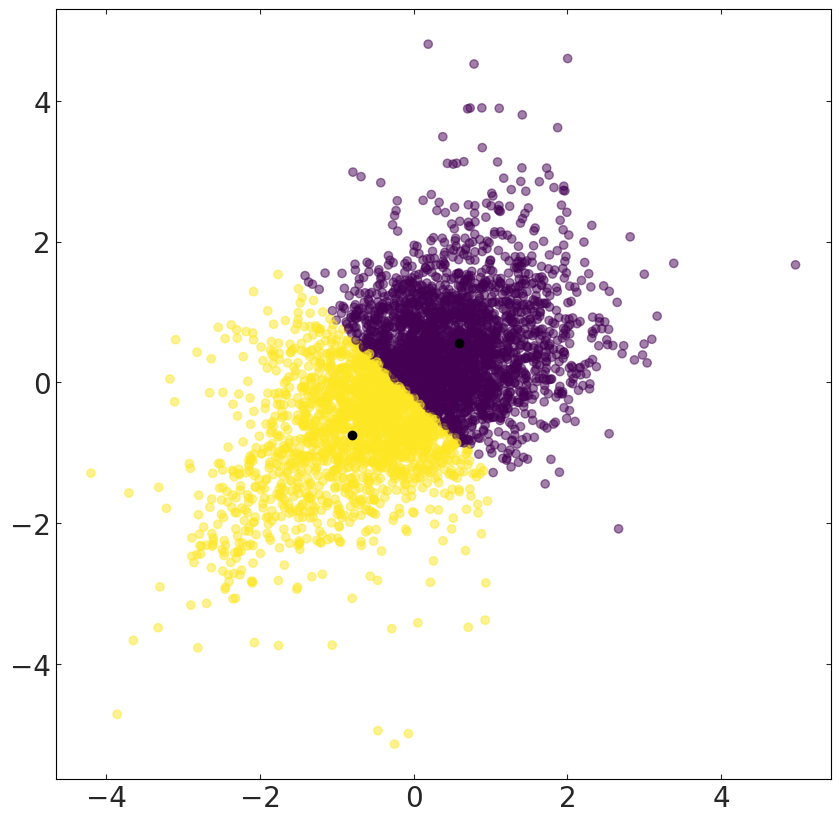

In [ ]:
#replot with the cluster centers on top
pl.scatter(scaledgenes[:,0], scaledgenes[:,1], c=km.labels_, alpha=.5)
pl.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], "ko")

**Figure 3**: The first two features of the scaled gene expression data are plotted, colored by the cluster assignments from KMeans with 2 clusters. The black circles represent the cluster centers. This plot illustrates how KMeans tends to form spherical (round) clusters.

In [ ]:
# Initialize KMeans with 2 clusters, fit to the scaled data, and display the labels
skl.cluster.KMeans(n_clusters = 2)
km.fit(scaledgenes)
km.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

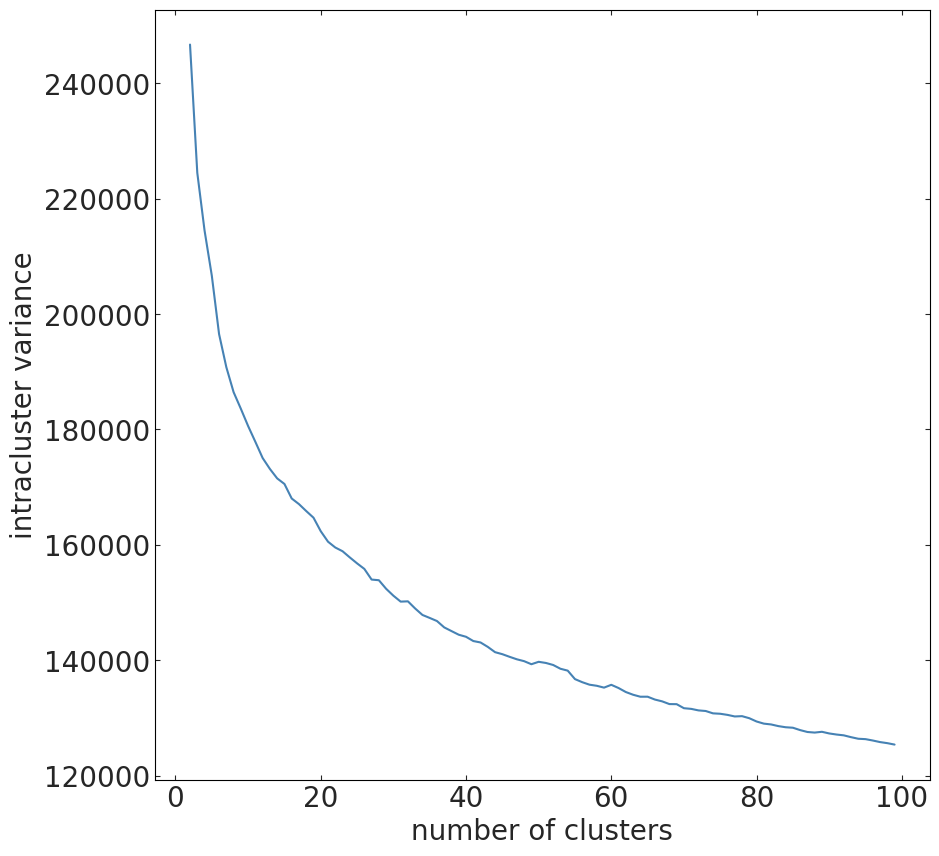

In [ ]:
# Calculate and plot the inertia (within-cluster sum of squares) for different numbers of clusters (2 to N-1)
# This is done to find the "elbow" in the plot, which suggests an optimal number of clusters
tv = []
N = 100
for i in range(2, N):
  km = skl.cluster.KMeans(n_clusters=i, random_state=302).fit(scaledgenes)
  tv.append(km.inertia_)
pl.plot(range(2,N), tv)
pl.xlabel("number of clusters")
pl.ylabel("intracluster variance");

**Figure 3**: an "elbow" plot for k-means clustering of the kidpack genes dataset shown in Figure 1. The prominent bend in the plot of intracluster variance vs number of clusters at Nclusters = 3 suggests that this is the correct number of clusters for a k-means clustering analysis

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

In [ ]:
# Perform KMeans clustering with the optimal number of clusters (3) on the scaled data
Nclust = 3
geneclustersKM = cluster.KMeans(n_clusters=Nclust).fit(scaledgenes)

In [ ]:
# Display the cluster labels assigned by KMeans
geneclustersKM.labels_

array([1, 1, 2, ..., 2, 2, 0], dtype=int32)

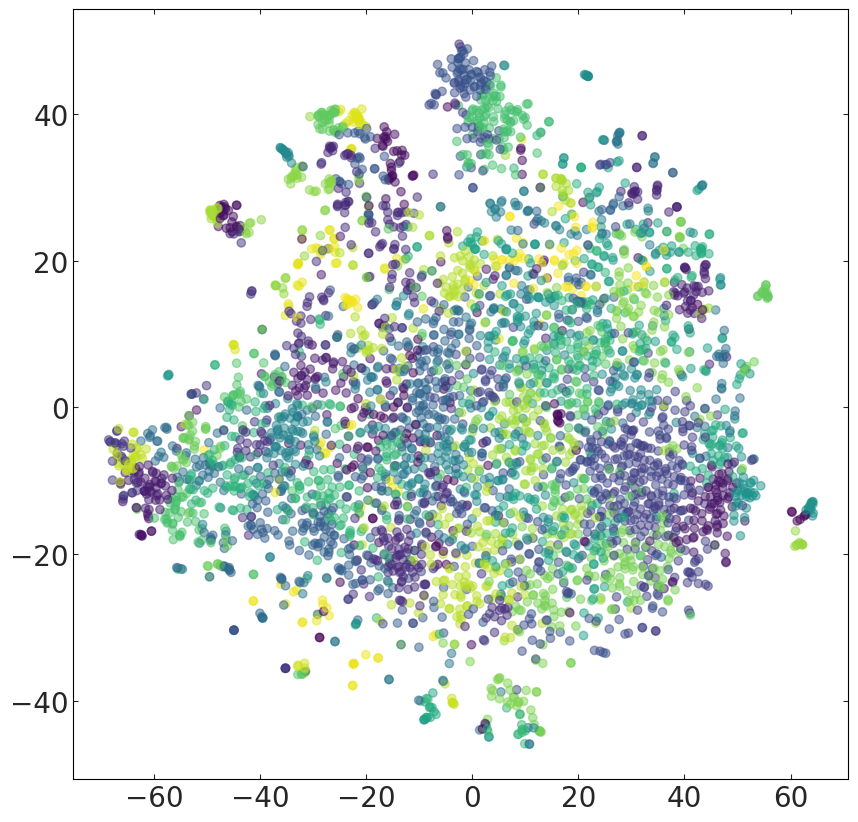

In [ ]:
# plots dont need to look exactly like mine
# Plot the 2D TSNE projection, colored by KMeans cluster labels
pl.scatter(twodproj[:,0], twodproj[:,1], c=km.labels_ / km.n_clusters, alpha=.5)


In [ ]:
# Display the coordinates of the cluster centers found by KMeans: the datapoints are 71-dimensional, the center are 71-dimensions
geneclustersKM.cluster_centers_

array([[-0.68,  0.15, -0.73, -1.13, -1.03,  0.1 ,  0.37,  0.87,  1.77,
        -0.59, -0.48, -0.23,  1.56,  0.52, -1.46, -1.13, -1.35, -0.18,
        -0.54,  1.45, -0.35, -0.27, -0.08, -0.96,  0.05, -0.87, -0.77,
        -1.02,  0.89, -0.82, -0.71, -0.14,  0.35,  0.65,  1.13,  1.33,
        -0.16, -0.6 , -0.47,  1.47, -0.16, -0.86, -0.89, -0.01, -0.73,
        -0.74,  0.32, -0.84, -1.64,  0.38, -0.86, -0.39, -1.14, -1.26,
        -0.9 , -0.82, -0.54,  0.33, -1.15, -1.13, -0.23, -0.69,  1.5 ,
        -0.52,  1.13, -0.94, -0.66, -1.14, -0.65,  0.09,  1.61,  0.63,
        -0.7 ,  0.16],
       [ 0.76,  0.47,  0.12,  0.71,  0.42,  0.37,  0.05,  0.18,  0.25,
         0.41,  0.15,  0.32,  0.41,  0.32,  0.72,  0.65,  0.29,  0.51,
         0.3 ,  0.19,  0.44,  0.29,  0.17,  0.69,  0.15,  0.41,  0.22,
         0.68,  0.37,  0.43,  0.25,  0.03,  0.43,  0.48,  0.15,  0.42,
         0.08,  0.55,  0.29,  0.38,  0.18,  0.53,  0.69,  0.36,  0.4 ,
         0.59,  0.22,  0.5 ,  0.23,  0.19,  0.82,  0.4

**Figure 3**: the clusters generated by K-means plotted in the 2D TSNE projection. The K-means clusters are adjacent in the TSNE 2D  projection, however they are not clearly separated indicating that There is no obvious pattern in common between the K-means model and the TSBE solution

# Use DBSCAN

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before.



In [ ]:
# Initialize and fit the DBSCAN model to the scaled gene expression data
dbsclusters = skl.cluster.DBSCAN(eps=4, min_samples=5).fit(scaledgenes)

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [ ]:
# Print the number of clusters found by DBSCAN (excluding noise points)
print("number of clusters:", dbsclusters.labels_.max() + 1)

number of clusters: 14


In [ ]:
# Calculate and print the number of outliers (noise points) found by DBSCAN
noutliers = (dbsclusters.labels_==-1).sum()
print("number of outliers:", noutliers)

number of outliers: 4024


In [ ]:
# Calculate and print the fraction of outliers
print("fraction of outliers: {:.2f}".format(noutliers * 1.0 / len(dbsclusters.labels_)))

fraction of outliers: 0.95


This hyperparameter selection leads to the identification of 30% of the points as "outliers". This fraction is too high and cannot be generally justified unless there is a strong contextual motivation for it. A better set of hyperparameters should be chosen

In [ ]:
# Get the unique labels assigned by DBSCAN and the count of data points in each cluster (including outliers as -1)
np.unique(dbsclusters.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([4024,   10,   29,   39,    7,   19,   13,   19,    5,   26,    5,
           7,    5,    5,   11]))

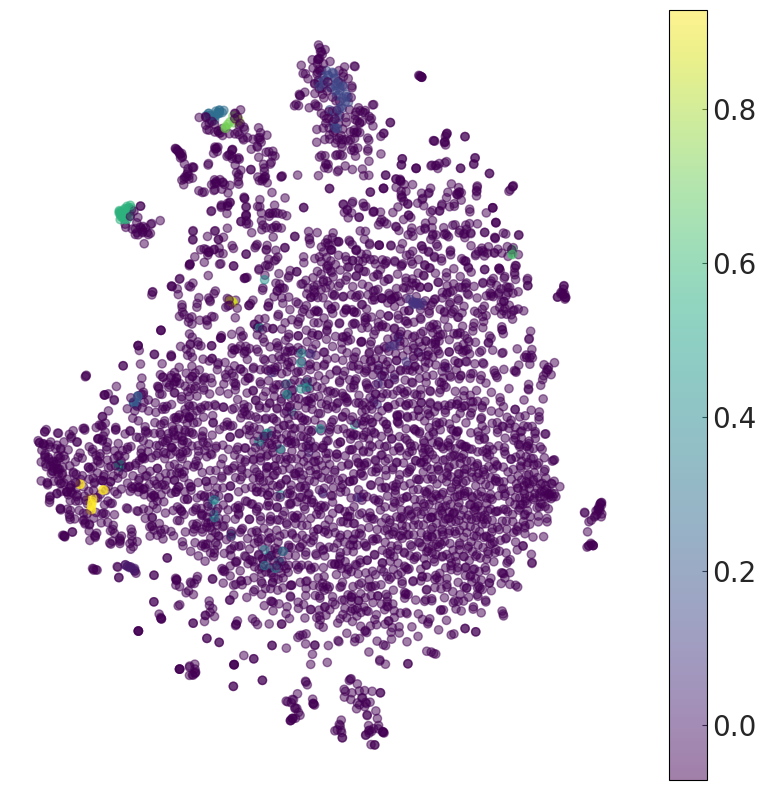

In [ ]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=dbsclusters.labels_/ (dbsclusters.labels_.max() + 1), alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 7**: the clusters generated by DBSCAN plotted in the 2D TSNE projection. There is no obvious pattern in common between the DBSCAN model and the TSBE solution

# 4b Agglomerative clustering


4b.1 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [ ]:
# Import necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Perform hierarchical clustering using the 'ward' linkage method
Z = linkage(scaledgenes, 'ward')

Text(0.5, 1.0, 'Agglomerative clustering linkage: Ward')

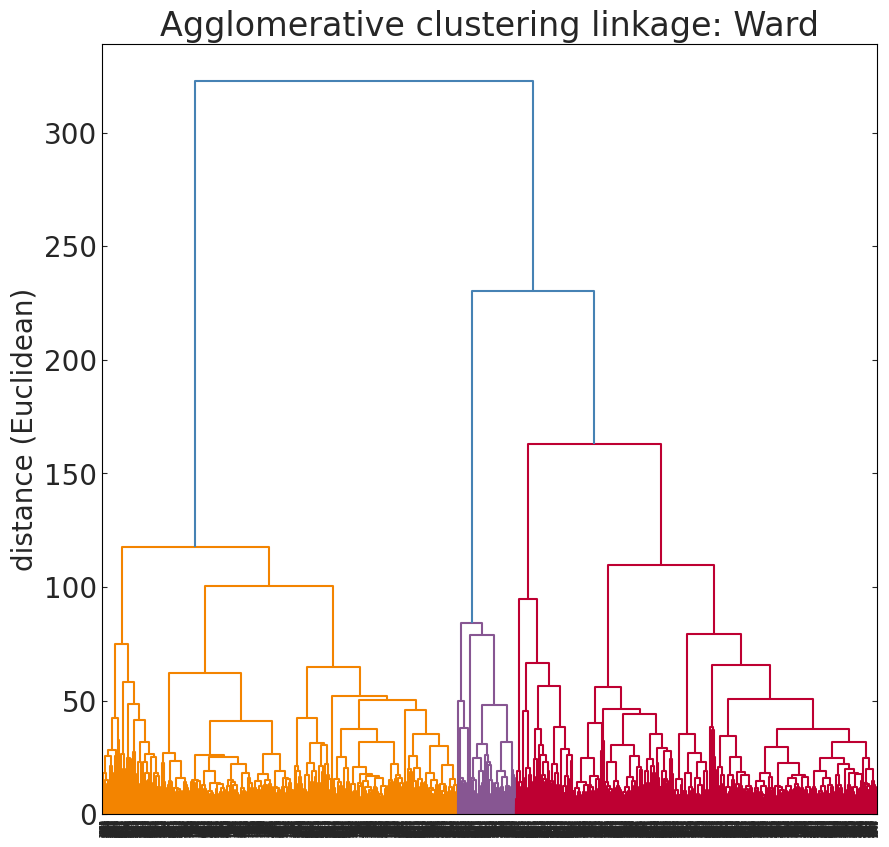

In [ ]:
# Plot the dendrogram for the 'ward' linkage
dendrogram(Z);
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Ward")

**Figure 8**: Result of clustering with Agglomerative algorithm, Eucledian distance and Ward linkage: the core aggregation provides 3 clusters (somwehat consistently with the result of the K-Means algorithm)

4b.2 repeat with a different linkage and comment on differences

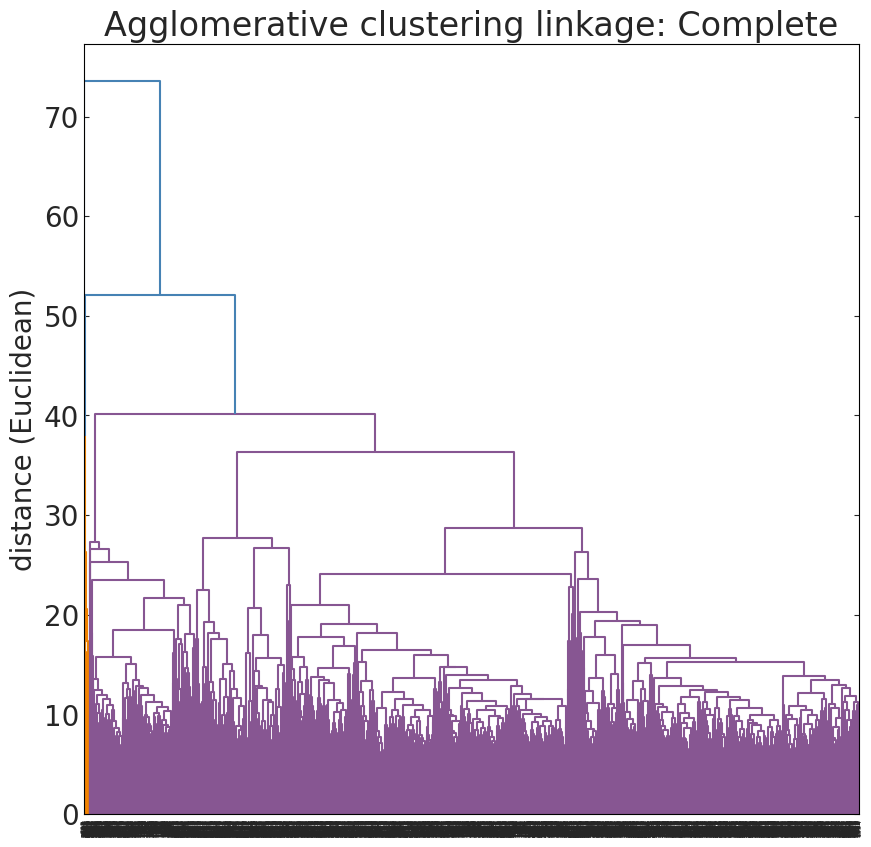

In [ ]:
# Perform hierarchical clustering using the 'complete' linkage method and plot the dendrogram
Z = linkage(scaledgenes, 'complete')
dendrogram(Z);
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Complete");

**Figure 9**: Result of clustering with Agglomerative algorithm, Eucledian distance and "complete" linkage, i.e. distance between clusters are calculates as the maximum distance between the element of the clusters. Since the linkage scheme is radically different, as ecxpected, the result of the agglomrataion is visibly different.


4b.3 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [ ]:
# Initialize and fit the Agglomerative Clustering model with 'ward' linkage and 'euclidean' metric
#linkage="ward", metric='euclidean'
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust, linkage="ward", metric='euclidean')


geneclustersAg.fit(scaledgenes)

AgglomerativeClustering(n_clusters=3)

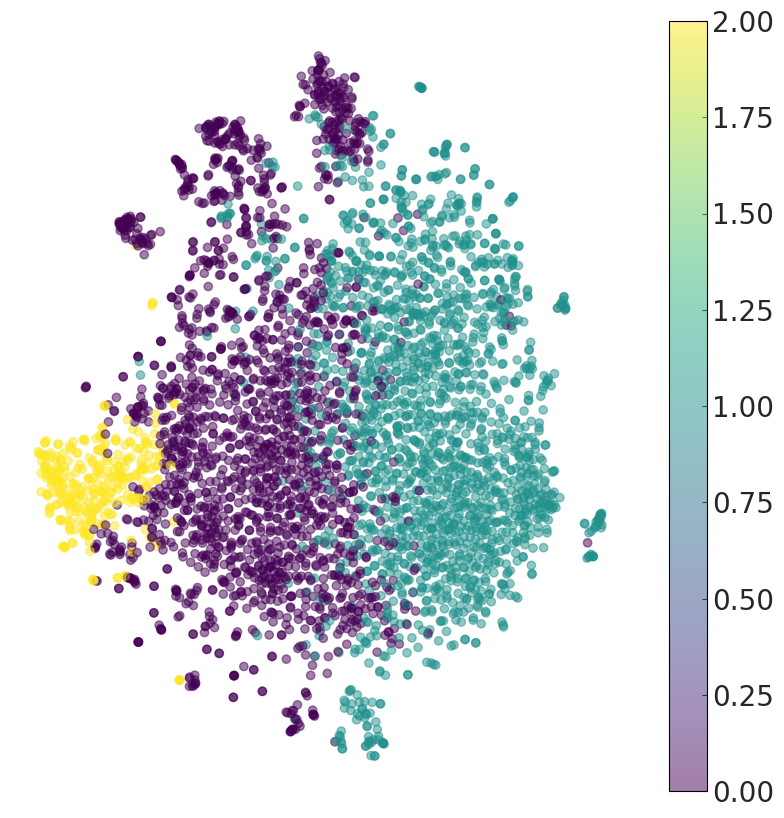

In [ ]:
# Plot the 2D projection of the data, colored by the cluster labels from the Agglomerative Clustering ('ward' linkage)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 10**: the rsult of agglomerative clustering performed with the same distance metric as the K-means clustering, for the same number of sclusters (and with Ward linkage) is generally consistent with the result obtained with K-Means clustering


In [ ]:
# Initialize and fit the Agglomerative Clustering model with 'complete' linkage and 'euclidean' metric
#linkage = complete, metric=euclidean
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust, linkage = "complete", metric="euclidean")
geneclustersAg.fit(scaledgenes)

AgglomerativeClustering(linkage='complete', n_clusters=3)

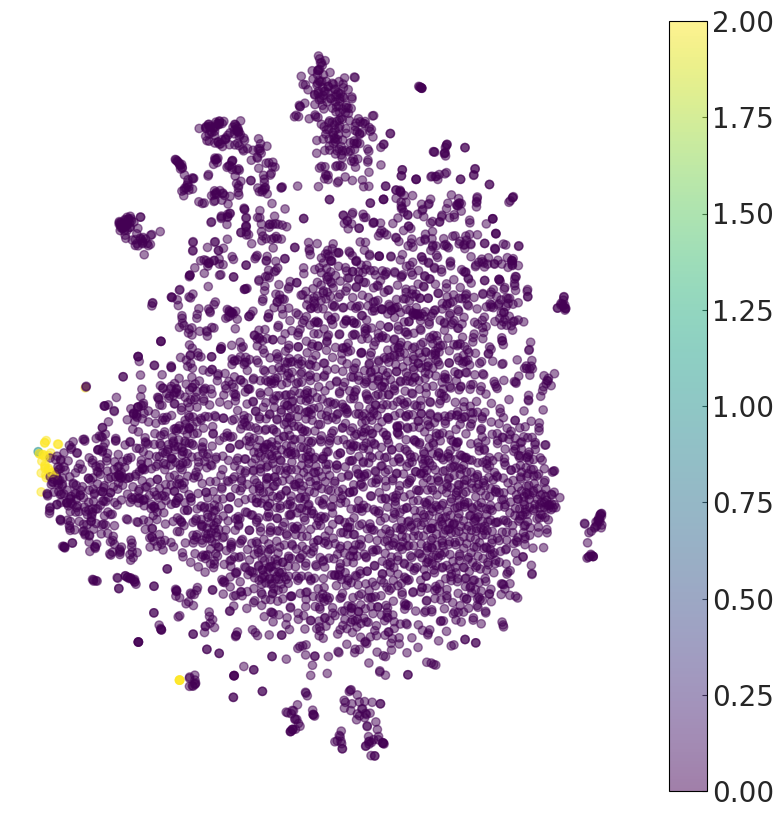

In [ ]:
# Plot the 2D projection of the data, colored by the cluster labels from the Agglomerative Clustering ('complete' linkage)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 11**: the rsult of agglomerative clustering performed with the same distance metric as the K-means clustering, for the same number of sclusters *but with complete linkage* is not consistent with the result obtained with K-Means clustering: the clusters are much more unbalanced (note that this was not required)